###PD controller for spring-mass-damper system

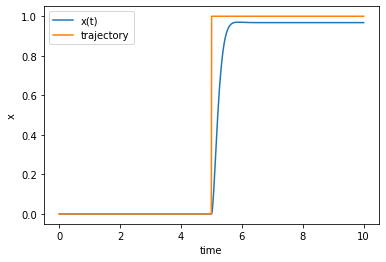

Eigenvalues of A-BK matrix: [-7.+3.60555128j -7.-3.60555128j]


In [0]:
import numpy as np
from math import sin, cos, sqrt
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import place_poles
from scipy.misc import derivative as dt

#time
start = 0
end = 10
quantity = 1000

t = np.linspace(start,end,quantity)

#coefficients
k = 2
m = 1
b = 2

#state matrix
A = np.array([[0,1],[-k/m, -b/m]])
#another matrix, I do not know it's name
B = np.array([[0],[1/m]])
#matrix with Kp and Kd coefficients
K = np.array([[60, 12]])

def trajectory(t):
  if t < 5:
    x_desired = 0
    x_desired_prime = 0
  else:
    x_desired = 1
    x_desired_prime = 0
  # x_desired = 5*t
  # x_desired_prime = t
  vector_x = np.array([x_desired, x_desired_prime])
  return vector_x

def e(x0, time):
  err = trajectory(time)[0] - x0[0]
  err_dot = trajectory(time)[-1] - x0[-1]
  matrix = np.array([err,err_dot])
  return matrix

def ODE(x0, time):
  x0 = np.reshape(x0, (2,1))
  u = K.dot(e(x0,time))
  return (A.dot(x0) + B.dot(u)).reshape(2,)

x0 = np.random.uniform(-1,1, 2)
x0 = np.array([0,0])
solution = odeint(ODE, x0, t)
plt.plot(t, solution[:,0], label='x(t)')
trajectory_graph = [trajectory(i)[0] for i in t]
plt.plot(t, trajectory_graph, label='trajectory')
plt.legend()
plt.xlabel('time')
plt.ylabel('x')
plt.show()

e, _ = np.linalg.eig(A-B.dot(K))
print("Eigenvalues of A-BK matrix:", e)

###PID controller for spring-mass-damper system

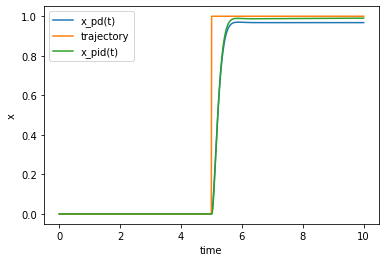

In [0]:
from scipy.integrate import quad

K_new = np.array([[60, 12, 5]])

def integrate(x0, time):
  dt = time[1]-time[0]
  x = np.empty([len(time), 2])
  
  x[0, :] = x0
  err_i = 0
  for i in range(1, len(time)):
    err = trajectory(time[i-1])[0] - x[i-1,0]
    err_dot = trajectory(time[i-1])[1] - x[i-1,1]
    err_i = err_i + (trajectory(time[i-1])[0] - x[i-1,0])*dt
    e = np.array([err, err_dot, err_i]).reshape(3,1)
    x_prime = A.dot(x[i-1]).reshape(2,1) + B.dot(K_new.dot(e))
    x[i,:] = (x[i-1].reshape(2,1) + x_prime.dot(dt)).reshape(2,)
  return x

solution2 = integrate(x0, t)
plt.plot(t, solution[:,0], label='x_pd(t)')
plt.plot(t, trajectory_graph, label='trajectory')
plt.plot(t, solution2[:,0], label='x_pid(t)')
plt.legend()
plt.xlabel('time')
plt.ylabel('x')
plt.show()